In [1]:
#conda install nltk

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##Prereqs for plotly and cufflinks
##plotly connects pandas and python to an interactive JS library
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True) ##connects the javascript to the notebook
cf.go_offline()
##ignore all warnings!! Use warnings.filterwarnings(action='once') instead to see the warnings once
import warnings
warnings.filterwarnings('ignore')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
import nltk

In [5]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [12]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [13]:
print(len(messages))

5574


In [14]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [15]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [16]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [17]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [18]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [20]:
messages['length']=messages['message'].apply(len)

In [21]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


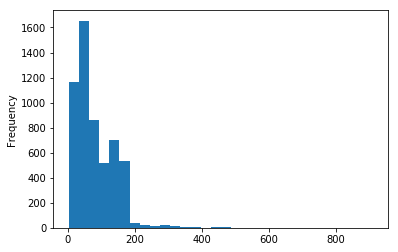

In [22]:
messages['length'].plot.hist(bins=30)

In [26]:
import string

In [53]:
mess ='Message @ with # too $ many & punctutations!!'

In [54]:
#Removing punctutation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
nonpunc=[c for c in mess if c not in string.punctuation]

In [56]:
nonpunc = ''.join(nonpunc)#punctutations removed and characters re-attached
nonpunc

'Message  with  too  many  punctutations'

In [47]:
##about the join method used above
x = ['a','b','c','d']
x= '#'.join(x) ##The parameter provided within the '' is used to join the characters
x

'a#b#c#d'

In [48]:
from nltk.corpus import stopwords

In [57]:
#splitting the list into words
nonpunc.split()

['Message', 'with', 'too', 'many', 'punctutations']

In [60]:
clean_mess = [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

In [62]:
clean_mess #removes all stopwords

['Message', 'many', 'punctutations']

In [63]:
def text_process(mess):
    """
    1. Remove punctutation
    2. Remove stopwords
    3. Return clean list
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [64]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [65]:
##Using the Bag of Words. We use the count vectorizer and create a 2d(sparse) matrix of the words and their frequency
##in each message

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [68]:
print(len(bow_transformer.vocabulary_))

11425


In [71]:
mess4 = messages['message'][3]

In [72]:
mess4

'U dun say so early hor... U c already then say...'

In [74]:
bow4 = bow_transformer.transform([mess4])

In [79]:
print(bow4) #there are 7 unique words in the bow

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [96]:
bow_transformer.get_feature_names()[9554] #passing the number for which we have a repetetion.

'say'

In [97]:
messages_bow = bow_transformer.transform(messages['message'])

In [98]:
print('Shape of the sparse matrix:', messages_bow.shape)

Shape of the sparse matrix: (5572, 11425)


In [100]:
messages_bow.nnz #number of non zero occurances

50548

In [101]:
from sklearn.feature_extraction.text import TfidfTransformer

In [102]:
tfidf = TfidfTransformer().fit(messages_bow)

In [104]:
tfidf4 = tfidf.transform(bow4)

In [106]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [108]:
tfidf.idf_[bow_transformer.vocabulary_['university']] #gives the inverse document frequency

8.527076498901426

In [109]:
messages_tfidf = tfidf.transform(messages_bow)

In [110]:
from sklearn.naive_bayes import MultinomialNB

In [111]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [113]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [115]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [116]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [117]:
from sklearn.cross_validation import train_test_split

In [118]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [120]:
##CREATING THE PIPELINE
from sklearn.pipeline import Pipeline

In [123]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [125]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a2ea479d8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [130]:
predictions = pipeline.predict(msg_test)

In [131]:
from sklearn.metrics import classification_report,confusion_matrix

In [132]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98      1439
       spam       1.00      0.71      0.83       233

avg / total       0.96      0.96      0.96      1672

